In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import librosa.display
import numpy as np

In [7]:
from src.tools.Segment import Segment
sr = 22050

In [8]:
def parrallelAnalysis(a):
    audio_data, sr = librosa.load(a, sr=22050)
    librosa.display.waveshow(audio_data, x_axis='time')
    
    segment = Segment()
    segment.loadAudio(a, offset=0, length = 3, target_sr=sr)
    segment.loadFeatures()
    features = segment.results.keys()
    for i, key in enumerate(segment.results.keys()):
        feature = segment.results[key]
        feature_shape = np.array(feature).shape
        feature_type = type(feature)
        if feature_type in [int] or feature_shape is ():
            print(i, key, feature_type, feature_shape, feature)
            continue
        if(feature_shape[0] == 1):
            feature = feature[0]
            feature_shape = np.array(feature).shape
            feature_type = type(feature)
            
        if(len(feature_shape) == 1):
            print(i, key, feature_type, feature_shape)
            fig, ax = plt.subplots()
            img = librosa.display.waveshow(feature, x_axis='time', ax=ax)
            ax.set(title=f'{key.title()}')
        else:
            print(i, key, feature_type, feature_shape)
            fig, ax = plt.subplots()
            img = librosa.display.specshow(feature, x_axis='time', y_axis='linear', ax=ax)
            ax.set(title=f'{key.title()}')
            fig.colorbar(img, ax=ax)
            # fig.colorbar(img, ax=ax, format="%+2.f dB")

0 length <class 'int'> () 66150
1 tempo <class 'numpy.float64'> () 103.359375
2 mfcc <class 'numpy.ndarray'> (20, 130)
3 chroma_stft <class 'numpy.ndarray'> (12, 130)
4 mfcc_delta <class 'numpy.ndarray'> (20, 130)
5 mfcc_delta_delta <class 'numpy.ndarray'> (20, 130)
6 rms <class 'numpy.ndarray'> (130,)
7 tonnetz <class 'numpy.ndarray'> (6, 130)
8 spectral_centroid <class 'numpy.ndarray'> (130,)
9 spectral_contrast <class 'numpy.ndarray'> (7, 130)
10 zero_crossing_rate <class 'numpy.ndarray'> (130,)
11 spectral_bandwidth <class 'numpy.ndarray'> (130,)
12 spectral_rolloff <class 'numpy.ndarray'> (130,)
13 harmony <class 'numpy.ndarray'> (66150,)
14 perceptr <class 'numpy.ndarray'> (66150,)


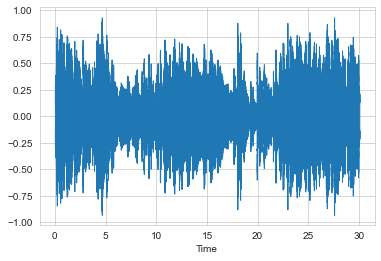

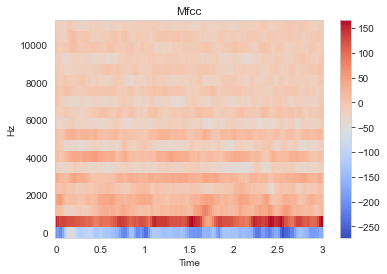

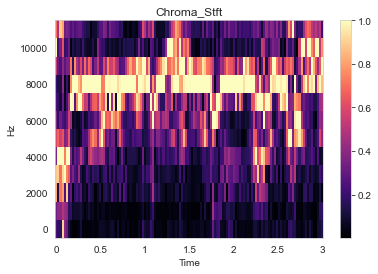

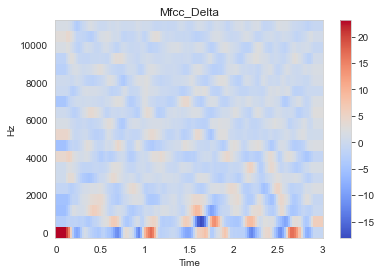

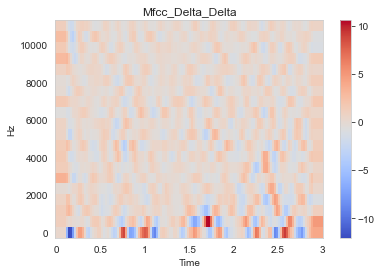

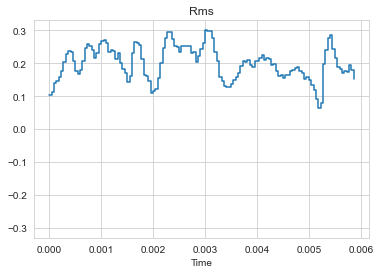

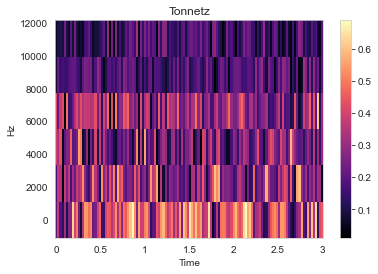

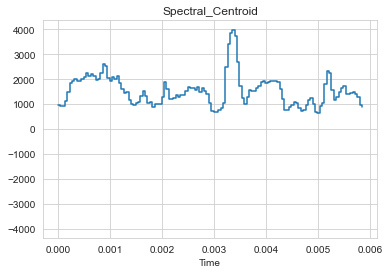

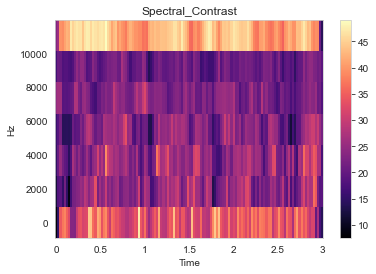

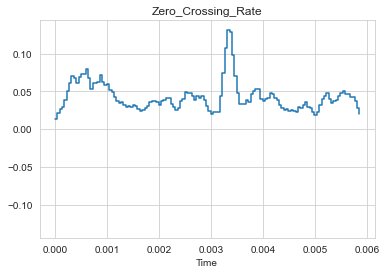

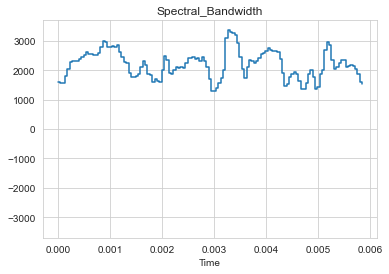

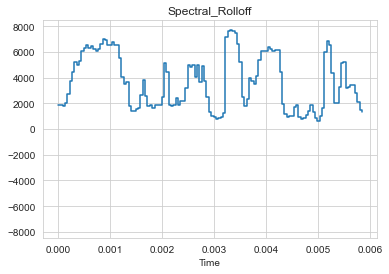

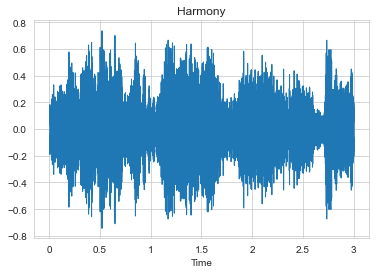

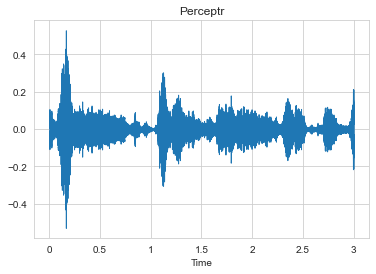

In [9]:
parrallelAnalysis('D:/Musik/Genres/Blues/blues.00038.wav')

0 length <class 'int'> () 66150
1 tempo <class 'numpy.float64'> () 80.74951171875
2 mfcc <class 'numpy.ndarray'> (20, 130)
3 chroma_stft <class 'numpy.ndarray'> (12, 130)
4 mfcc_delta <class 'numpy.ndarray'> (20, 130)
5 mfcc_delta_delta <class 'numpy.ndarray'> (20, 130)
6 rms <class 'numpy.ndarray'> (130,)
7 tonnetz <class 'numpy.ndarray'> (6, 130)
8 spectral_centroid <class 'numpy.ndarray'> (130,)
9 spectral_contrast <class 'numpy.ndarray'> (7, 130)
10 zero_crossing_rate <class 'numpy.ndarray'> (130,)
11 spectral_bandwidth <class 'numpy.ndarray'> (130,)
12 spectral_rolloff <class 'numpy.ndarray'> (130,)
13 harmony <class 'numpy.ndarray'> (66150,)
14 perceptr <class 'numpy.ndarray'> (66150,)


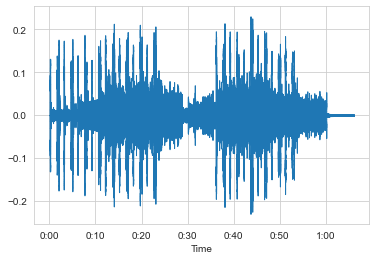

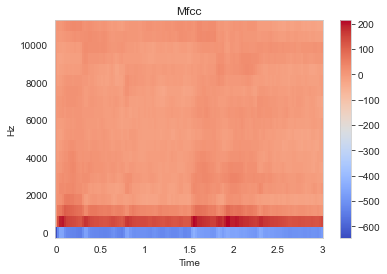

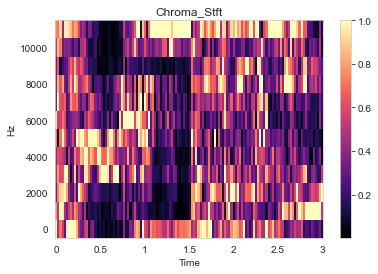

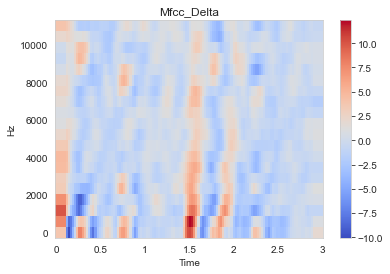

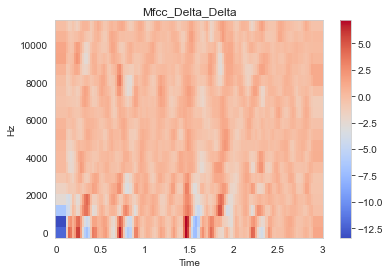

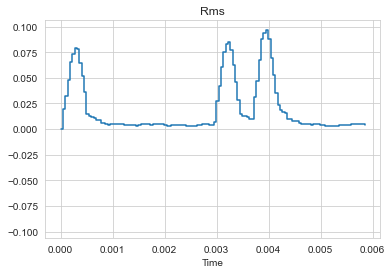

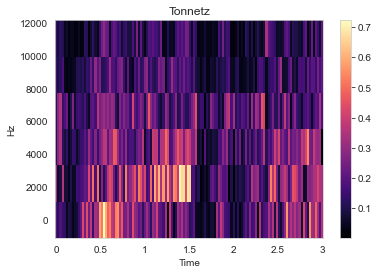

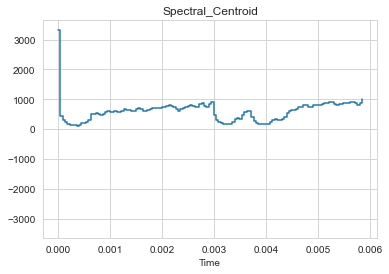

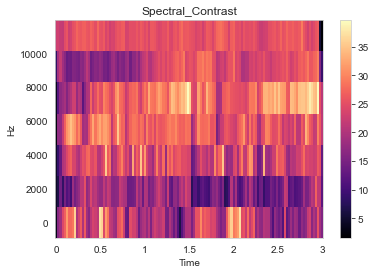

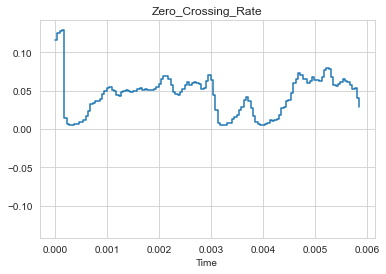

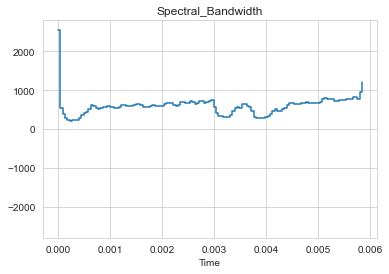

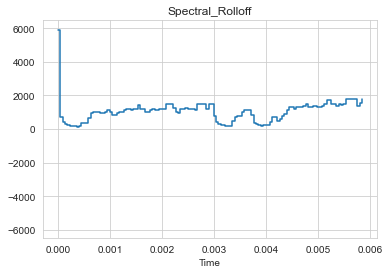

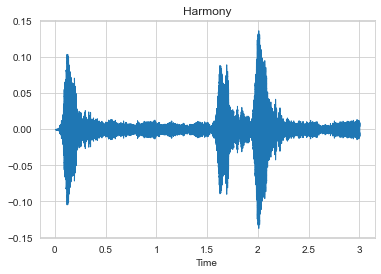

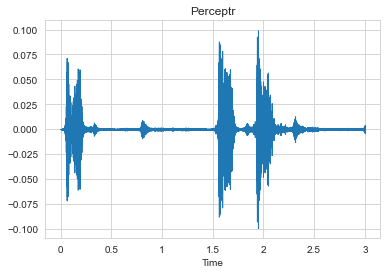

In [10]:
parrallelAnalysis('D:/Musik/Archive/cry_v2.mp3')